<a href="https://colab.research.google.com/github/Priyo-prog/Statistics-and-Data-Science/blob/main/Outliers/dealing_with_outliers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Outliers**

Sometimes our dataset is not nice enough to simply have a NaN or Zero values to make it easy to tell what we should remove. Sometimes our dataset has outliers in it. So let's see some strategies to identifying these points.

## Import Libraries and packages

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

filename_1 = '/content/drive/MyDrive/Data Science/Statistical Analysis/outlier_1d.txt'
filename_2 = '/content/drive/MyDrive/Data Science/Statistical Analysis/outlier_2d.txt'
filename_3 = '/content/drive/MyDrive/Data Science/Statistical Analysis/outlier_curve.txt'

## Load the data

In [2]:
## mount the google drive to fetch the data
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


(1010,) (1010, 2)


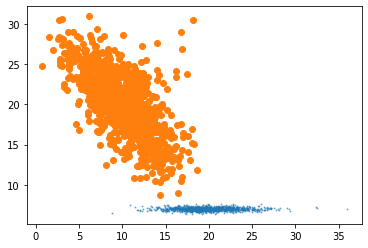

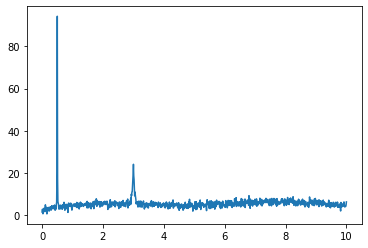

In [4]:
d1 = np.loadtxt(filename_1)
d2 = np.loadtxt(filename_2)
d3 = np.loadtxt(filename_3)
print(d1.shape, d2.shape)

plt.scatter(d1, np.random.normal(7, 0.2, size=d1.size), s=1, alpha=0.5)
plt.scatter(d2[:, 0], d2[:, 1])
plt.show()
plt.plot(d3[:, 0], d3[:, 1])

## **Basics**

The most basic and most common way of manually doing outlier pruning on data distributions is to :

1. Model your data at some alnalytical distribution

2. Find all points below a certain probability

3. Remove them

4. Refit the distributions, and potentially run again from Step 1

Rejection 5 points
z-score of 3 corresponds to a prob of 0.27%


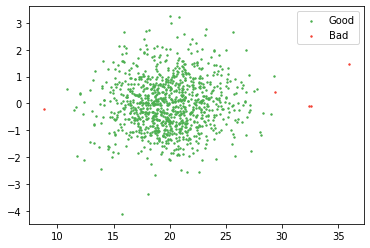

In [8]:
mean, std = np.mean(d1), np.std(d1)
z_score = np.abs((d1 - mean) / std)
threshold = 3
good = z_score < threshold

print(f"Rejection {(~good).sum()} points")
print(f"z-score of 3 corresponds to a prob of {100 * 2 * norm.sf(threshold):0.2f}%")
visual_scatter = np.random.normal(size=d1.size)
plt.scatter(d1[good], visual_scatter[good], s=2, label="Good", color='#4CAF50')
plt.scatter(d1[~good], visual_scatter[~good], s=2, label="Bad", color='#F44336')
plt.legend()